In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ycchen777","key":"d71a78a08ced249f563aba1d73f38579"}'}

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d sudalairajkumar/novel-corona-virus-2019-dataset

novel-corona-virus-2019-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip novel-corona-virus-2019-dataset.zip

Archive:  novel-corona-virus-2019-dataset.zip
replace COVID19_line_list_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace COVID19_open_line_list.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace covid_19_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace time_series_covid_19_confirmed.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace time_series_covid_19_confirmed_US.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace time_series_covid_19_deaths.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace time_series_covid_19_deaths_US.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace time_series_covid_19_recovered.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv(r"/content/covid_19_data.csv")
data.head(20)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0000000000,0.0000000000,0.0000000000
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0000000000,0.0000000000,0.0000000000
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0000000000,0.0000000000,0.0000000000
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0000000000,0.0000000000,0.0000000000
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0000000000,0.0000000000,0.0000000000
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0000000000,0.0000000000,0.0000000000
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0000000000,0.0000000000,0.0000000000
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0000000000,0.0000000000,0.0000000000
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0000000000,0.0000000000,0.0000000000
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0000000000,0.0000000000,0.0000000000


In [ ]:
data = data.sort_values(by=["Country/Region", "ObservationDate"], ascending=(True, True))
data["Active"] = data["Confirmed"] - data["Deaths"] - data["Recovered"]
data.head(20)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active
2663,2664,02/28/2020,NaN,Azerbaijan,2020-02-28T15:03:26,1.0000000000,0.0000000000,0.0000000000,1.0000000000
4674,4675,03/10/2020,NaN,"('St. Martin',)",2020-03-10T05:33:02,2.0000000000,0.0000000000,0.0000000000,2.0000000000
2258,2259,02/24/2020,NaN,Afghanistan,2020-02-24T23:33:02,1.0000000000,0.0000000000,0.0000000000,1.0000000000
2351,2352,02/25/2020,NaN,Afghanistan,2020-02-24T23:33:02,1.0000000000,0.0000000000,0.0000000000,1.0000000000
2452,2453,02/26/2020,NaN,Afghanistan,2020-02-24T23:33:02,1.0000000000,0.0000000000,0.0000000000,1.0000000000
2556,2557,02/27/2020,NaN,Afghanistan,2020-02-24T23:33:02,1.0000000000,0.0000000000,0.0000000000,1.0000000000
2664,2665,02/28/2020,NaN,Afghanistan,2020-02-24T23:33:02,1.0000000000,0.0000000000,0.0000000000,1.0000000000
2782,2783,02/29/2020,NaN,Afghanistan,2020-02-24T23:33:02,1.0000000000,0.0000000000,0.0000000000,1.0000000000
2910,2911,03/01/2020,NaN,Afghanistan,2020-02-24T23:33:02,1.0000000000,0.0000000000,0.0000000000,1.0000000000
3041,3042,03/02/2020,NaN,Afghanistan,2020-02-24T23:33:02,1.0000000000,0.0000000000,0.0000000000,1.0000000000


In [ ]:
def clean_data(data, country):
  data = data[data["Country/Region"]==country]
  data.index = range(len(data))
  data = data.groupby(["Country/Region", "ObservationDate"])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
  # data["Confirmed_Increase"] = data["Confirmed"] - data["Confirmed"].shift(1)  #Confirmed_Increase
  # data["Confirmed_Increase"] = data["Confirmed_Increase"].fillna(data["Confirmed"][0]) #第一項補空值
  data["Deaths_Increase"] = data["Deaths"] - data["Deaths"].shift(1)
  data["Deaths_Increase"] = data["Deaths_Increase"].fillna(data["Deaths"][0])
  data["Recovered_Increase"] = data["Recovered"] - data["Recovered"].shift(1)
  data["Recovered_Increase"] = data["Recovered_Increase"].fillna(data["Recovered"][0])
  data["d_Rec_d_Dea"] = data["Recovered_Increase"] - data["Deaths_Increase"] #d_Rec_d_Dea
  data["Active_rate"] = (data["Active"] - data["Active"].shift(1))/ data["Active"].shift(1)
  data["Active_rate"] = data["Active_rate"].fillna(0)
  return data

In [ ]:
data_Japan = clean_data(data, "Japan")
data_Japan

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,Country/Region,ObservationDate,Confirmed,Deaths,Recovered,Active,Deaths_Increase,Recovered_Increase,d_Rec_d_Dea,Active_rate
0,Japan,01/22/2020,2.0000000000,0.0000000000,0.0000000000,2.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
1,Japan,01/23/2020,1.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,-0.5000000000
2,Japan,01/24/2020,2.0000000000,0.0000000000,0.0000000000,2.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000
3,Japan,01/25/2020,2.0000000000,0.0000000000,0.0000000000,2.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
4,Japan,01/26/2020,4.0000000000,0.0000000000,1.0000000000,3.0000000000,0.0000000000,1.0000000000,1.0000000000,0.5000000000
5,Japan,01/27/2020,4.0000000000,0.0000000000,1.0000000000,3.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
6,Japan,01/28/2020,7.0000000000,0.0000000000,1.0000000000,6.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000
7,Japan,01/29/2020,7.0000000000,0.0000000000,1.0000000000,6.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
8,Japan,01/30/2020,11.0000000000,0.0000000000,1.0000000000,10.0000000000,0.0000000000,0.0000000000,0.0000000000,0.6666666667
9,Japan,01/31/2020,15.0000000000,0.0000000000,1.0000000000,14.0000000000,0.0000000000,0.0000000000,0.0000000000,0.4000000000


In [ ]:
import torch
import torch.utils.data as Data
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def choose_data(data):
  data_con = data.loc[:, ["Confirmed"]].values
  data_dea = data.loc[:,["Deaths"]].values
  data_rec = data.loc[:,["Recovered"]].values
  data_obser = data.loc[:,["ObservationDate"]].values
  data_d_Rec_d_Dea = data.loc[:, ["d_Rec_d_Dea"]].values
  data_Active_rate = data.loc[:, ["Active_rate"]].values
  return data_con, data_dea, data_rec, data_obser, data_d_Rec_d_Dea, data_Active_rate

In [ ]:
Japan_con, Japan_dea, Japan_rec, Japan_obser, Japan_d_Rec_d_Dea, Japan_Active_rate = choose_data(data_Japan)

In [ ]:
def plot_data(data_con, data_dea, data_rec, data_obser):
  data_obser = [datetime.strptime(str(d), "['%m/%d/%Y']").date() for d in data_obser]
  plt.plot(data_obser, data_con, "blue")
  plt.plot(data_obser, data_dea, "orange")
  plt.plot(data_obser, data_rec, "green")
  # plt.plot(data_obser, data_d_Rec_d_Dea, "red")
  plt.gcf().autofmt_xdate()
  plt.show()

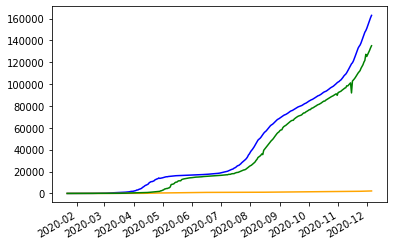

In [ ]:
plot_data(Japan_con, Japan_dea, Japan_rec, Japan_obser)

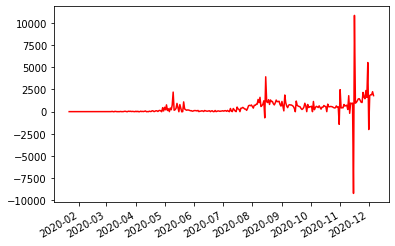

In [ ]:
data_obser_dd = [datetime.strptime(str(d), "['%m/%d/%Y']").date() for d in Japan_obser]
plt.plot(data_obser_dd, Japan_d_Rec_d_Dea, "red")
plt.gcf().autofmt_xdate()
plt.show()

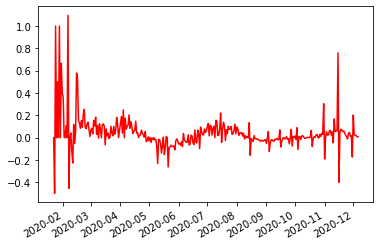

In [ ]:
data_obser_ac_rate = [datetime.strptime(str(d), "['%m/%d/%Y']").date() for d in Japan_obser]
plt.plot(data_obser_ac_rate, Japan_Active_rate, "red")
plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sc_con = MinMaxScaler()
sc_d_Rec_d_Dea = MinMaxScaler()
sc_ac_rate = MinMaxScaler()
sc_dea = MinMaxScaler()
sc_rec = MinMaxScaler()
Japan_con = sc_con.fit_transform(Japan_con)
Japan_d_Rec_d_Dea = sc_d_Rec_d_Dea.fit_transform(Japan_d_Rec_d_Dea)
Japan_Active_rate = sc_ac_rate.fit_transform(Japan_Active_rate)
Japan_dea = sc_dea.fit_transform(Japan_dea)
Japan_rec = sc_rec.fit_transform(Japan_rec)

#Dataset

In [ ]:
from torch.autograd import Variable

In [ ]:
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)


seq_length = 30
x, y = sliding_windows(Japan_con, seq_length) #confirmed
x_dd, y_dd = sliding_windows(Japan_d_Rec_d_Dea, seq_length) #d_Rec_d_Dea
x_ac_rate, y_ac_rate = sliding_windows(Japan_Active_rate, seq_length) #ac_rate
x_dea, y_dea = sliding_windows(Japan_dea, seq_length) #dea
x_rec, y_rec = sliding_windows(Japan_rec, seq_length) #ac_rate

train_size = int(len(y) * 0.9)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x[0:len(x)])))
dataY = Variable(torch.Tensor(np.array(y[0:len(x)])))
trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))
testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

dataX_dd = Variable(torch.Tensor(np.array(x_dd[0:len(x)])))
dataY_dd = Variable(torch.Tensor(np.array(y_dd[0:len(x)])))
trainX_dd = Variable(torch.Tensor(np.array(x_dd[0:train_size])))
trainY_dd = Variable(torch.Tensor(np.array(y_dd[0:train_size])))
testX_dd = Variable(torch.Tensor(np.array(x_dd[train_size:len(x)])))
testY_dd = Variable(torch.Tensor(np.array(y_dd[train_size:len(y)])))

dataX_ac_rate = Variable(torch.Tensor(np.array(x_ac_rate[0:len(x)])))
dataY_ac_rate = Variable(torch.Tensor(np.array(y_ac_rate[0:len(x)])))
trainX_ac_rate = Variable(torch.Tensor(np.array(x_ac_rate[0:train_size])))
trainY_ac_rate = Variable(torch.Tensor(np.array(y_ac_rate[0:train_size])))
testX_ac_rate = Variable(torch.Tensor(np.array(x_ac_rate[train_size:len(x)])))
testY_ac_rate = Variable(torch.Tensor(np.array(y_ac_rate[train_size:len(y)])))

dataX__dea = Variable(torch.Tensor(np.array(x_dea[0:len(x)])))
dataY__dea = Variable(torch.Tensor(np.array(y_dea[0:len(x)])))
trainX_dea = Variable(torch.Tensor(np.array(x_dea[0:train_size])))
trainY_dea = Variable(torch.Tensor(np.array(y_dea[0:train_size])))
testX_dea = Variable(torch.Tensor(np.array(x_dea[train_size:len(x)])))
testY_dea = Variable(torch.Tensor(np.array(y_dea[train_size:len(y)])))

dataX_rec = Variable(torch.Tensor(np.array(x_rec[0:len(x)])))
dataY_rec = Variable(torch.Tensor(np.array(y_rec[0:len(x)])))
trainX_rec = Variable(torch.Tensor(np.array(x_rec[0:train_size])))
trainY_rec = Variable(torch.Tensor(np.array(y_rec[0:train_size])))
testX_rec = Variable(torch.Tensor(np.array(x_rec[train_size:len(x)])))
testY_rec = Variable(torch.Tensor(np.array(y_rec[train_size:len(y)])))

#Model

In [ ]:
import torch.nn as nn

In [ ]:
class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()

        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))

        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        h_out = h_out.view(-1, self.hidden_size)
        out = self.fc(h_out)
        # out = self.fc(ula)
        return out

In [ ]:
lstm_confirmed = LSTM(num_classes=1, input_size=1, hidden_size=64, num_layers=1)
lstm_dd = LSTM(num_classes=1, input_size=1, hidden_size=32, num_layers=1)
lstm_ac_rate = LSTM(num_classes=1, input_size=1, hidden_size=32, num_layers=1)
lstm_dea = LSTM(num_classes=1, input_size=1, hidden_size=64, num_layers=1)
lstm_rec = LSTM(num_classes=1, input_size=1, hidden_size=64, num_layers=1)

In [ ]:
criterion_confirmed = torch.nn.MSELoss()   # mean-squared error for regression
criterion_dd = torch.nn.MSELoss()
criterion_ac_rate = torch.nn.MSELoss()
criterion_dea = torch.nn.MSELoss()
criterion_rec = torch.nn.MSELoss()
optimizer_confirmed = torch.optim.Adam(lstm_confirmed.parameters(), lr=0.00001)
optimizer_dd = torch.optim.Adam(lstm_dd.parameters(), lr=0.01)
optimizer_ac_rate = torch.optim.Adam(lstm_ac_rate.parameters(), lr=0.01)
optimizer_dea = torch.optim.Adam(lstm_dea.parameters(), lr=0.00001)
optimizer_rec = torch.optim.Adam(lstm_rec.parameters(), lr=0.00001)

#Confirmed

In [ ]:
num_epochs = 3500

In [ ]:
L_confirmed = []

# Train the model
for epoch in range(num_epochs):
    outputs = lstm_confirmed(trainX)
    optimizer_confirmed.zero_grad()
    loss = criterion_confirmed(outputs, trainY)
    loss.backward()
    optimizer_confirmed.step()
    L_confirmed.append(loss.item())

    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.10f" % (epoch, loss.item()))

Epoch: 0, loss: 0.1483440399
Epoch: 100, loss: 0.1387487203
Epoch: 200, loss: 0.1297321767
Epoch: 300, loss: 0.1211082712
Epoch: 400, loss: 0.1127593741
Epoch: 500, loss: 0.1045959294
Epoch: 600, loss: 0.0965558738
Epoch: 700, loss: 0.0885953978
Epoch: 800, loss: 0.0806885660
Epoch: 900, loss: 0.0728393346
Epoch: 1000, loss: 0.0650964528
Epoch: 1100, loss: 0.0575787537
Epoch: 1200, loss: 0.0505255200
Epoch: 1300, loss: 0.0443557017
Epoch: 1400, loss: 0.0396173634
Epoch: 1500, loss: 0.0365807191
Epoch: 1600, loss: 0.0347314142
Epoch: 1700, loss: 0.0332631096
Epoch: 1800, loss: 0.0317839496
Epoch: 1900, loss: 0.0301743783
Epoch: 2000, loss: 0.0283611417
Epoch: 2100, loss: 0.0262583233
Epoch: 2200, loss: 0.0237561967
Epoch: 2300, loss: 0.0207301229
Epoch: 2400, loss: 0.0171028562
Epoch: 2500, loss: 0.0130198244
Epoch: 2600, loss: 0.0090570850
Epoch: 2700, loss: 0.0060102427
Epoch: 2800, loss: 0.0042102314
Epoch: 2900, loss: 0.0033581385
Epoch: 3000, loss: 0.0029983972
Epoch: 3100, loss: 0

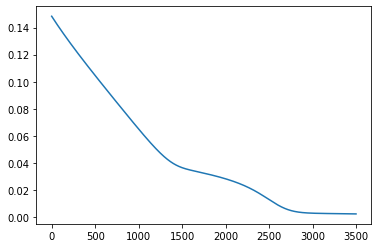

In [ ]:
plt.plot(L_confirmed)
plt.show()

In [ ]:
torch.save(lstm_confirmed, "lstm_confirmed.pkl")

In [ ]:
lstm_confirmed.eval()
train_predict_confirmed = lstm_confirmed(dataX)  #全部的x丟model

#把預測出來的加到原本的dataX，再用新的dataX丟模型
dataX_copy2_confirmed = dataX
train_predict_copy2_confirmed = train_predict_confirmed
# print(train_predict_copy2[-3:-1])
for i in range(150):
  last = train_predict_copy2_confirmed[-1].reshape(1, 1)
  temp = dataX_copy2_confirmed[-1][1:]
  temp = torch.cat((temp, last), 0)

  temp = temp.reshape(1, seq_length, 1)
  dataX_copy2_confirmed = torch.cat((dataX_copy2_confirmed, temp), 0)

  predict = lstm_confirmed(dataX_copy2_confirmed.float())
  # print(predict[-1])
  train_predict_copy2_confirmed = torch.cat((train_predict_copy2_confirmed, predict[-1].reshape(1, 1)), 0)


train_predict_copy2_confirmed = train_predict_copy2_confirmed.data.numpy()
data_predict_confirmed = sc_con.inverse_transform(train_predict_copy2_confirmed)

dataY_plot_confirmed = dataY.data.numpy()
dataY_plot_confirmed = sc_con.inverse_transform(dataY_plot_confirmed)


predicted = pd.DataFrame(data_predict_confirmed)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format',lambda x : '%.10f' % x)
print(predicted[-150:])

                    0
290 159440.3281250000
291 160989.7187500000
292 162488.7500000000
293 163942.7500000000
294 165344.7656250000
295 166692.0000000000
296 167983.3281250000
297 169218.2968750000
298 170396.7812500000
299 171521.9531250000
300 172599.3593750000
301 173619.6406250000
302 174578.4062500000
303 175476.8906250000
304 176317.5937500000
305 177102.1875000000
306 177837.6250000000
307 178531.3750000000
308 179186.4375000000
309 179797.1718750000
310 180361.3281250000
311 180881.5312500000
312 181359.9843750000
313 181804.4531250000
314 182221.3125000000
315 182607.8125000000
316 182963.1406250000
317 183289.9843750000
318 183591.6250000000
319 183870.5468750000
320 184163.6093750000
321 184436.1406250000
322 184689.7656250000
323 184925.7343750000
324 185145.1562500000
325 185348.9843750000
326 185538.2031250000
327 185713.8125000000
328 185876.5937500000
329 186027.4531250000
330 186167.1406250000
331 186296.3906250000
332 186415.8750000000
333 186526.3906250000
334 186628

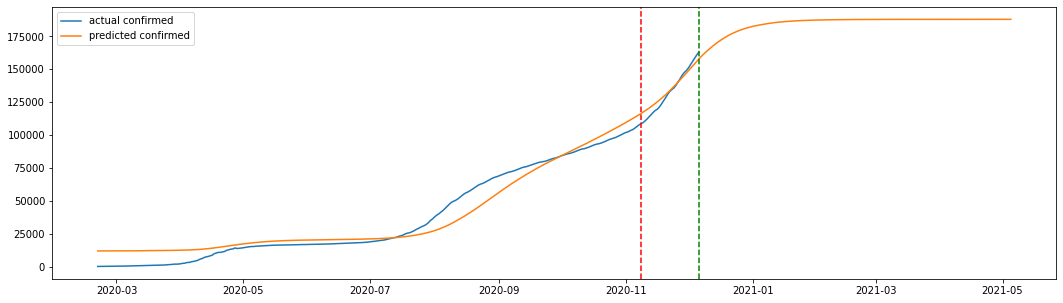

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

startDate = '2020-01-22'
endDate = '2021-05-05'
index = pd.date_range(startDate, endDate)

data_actual_confirmed = dataY_plot_confirmed.reshape(-1)
data_predict_confirmed = data_predict_confirmed.reshape(-1)

cols = ['value']

df = pd.DataFrame(data_actual_confirmed, index=index[30:-150], columns=cols)
df2 = pd.DataFrame(data_predict_confirmed, index=index[30:], columns=cols)
# df.index.freq = 'd'

fig, axs = plt.subplots(1,1, figsize=(18,5))

x = df.index
x2 = df2.index
y = df.value
y2 = df2.value

# print(y.index[train_size])

axs.plot(x, y, label="actual confirmed")
axs.plot(x2, y2, label="predicted confirmed")
plt.axvline(x=y.index[train_size], c='r', linestyle='--')
plt.axvline(x=y.index[-1], c='g', linestyle='--')
plt.legend()
fig.show()

#Death

In [ ]:
L_death = []

# Train the model
for epoch in range(num_epochs):
    outputs = lstm_dea(trainX_dea)
    optimizer_dea.zero_grad()
    loss = criterion_dea(outputs, trainY_dea)
    loss.backward()
    optimizer_dea.step()
    L_death.append(loss.item())

    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.10f" % (epoch, loss.item()))

Epoch: 0, loss: 0.2135611475
Epoch: 100, loss: 0.2024139166
Epoch: 200, loss: 0.1914125085
Epoch: 300, loss: 0.1803658456
Epoch: 400, loss: 0.1690198332
Epoch: 500, loss: 0.1570748240
Epoch: 600, loss: 0.1442551762
Epoch: 700, loss: 0.1302883625
Epoch: 800, loss: 0.1148759425
Epoch: 900, loss: 0.0977318287
Epoch: 1000, loss: 0.0787325278
Epoch: 1100, loss: 0.0585799627
Epoch: 1200, loss: 0.0413721204
Epoch: 1300, loss: 0.0342692435
Epoch: 1400, loss: 0.0312626809
Epoch: 1500, loss: 0.0281537324
Epoch: 1600, loss: 0.0248595160
Epoch: 1700, loss: 0.0214519985
Epoch: 1800, loss: 0.0180717371
Epoch: 1900, loss: 0.0149134267
Epoch: 2000, loss: 0.0121760182
Epoch: 2100, loss: 0.0099956235
Epoch: 2200, loss: 0.0084016481
Epoch: 2300, loss: 0.0073225009
Epoch: 2400, loss: 0.0066297827
Epoch: 2500, loss: 0.0061887866
Epoch: 2600, loss: 0.0058910721
Epoch: 2700, loss: 0.0056641763
Epoch: 2800, loss: 0.0054664030
Epoch: 2900, loss: 0.0052766097
Epoch: 3000, loss: 0.0050852178
Epoch: 3100, loss: 0

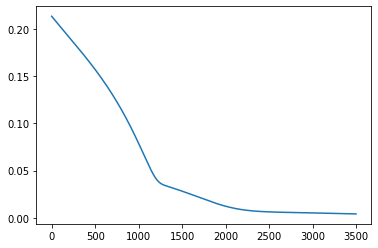

In [ ]:
plt.plot(L_death)
plt.show()

In [ ]:
torch.save(lstm_dea, "lstm_dea_2.pkl")

In [ ]:
lstm_dea.eval()
train_predict_dea = lstm_dea(dataX__dea)  #全部的x丟model

#把預測出來的加到原本的dataX，再用新的dataX丟模型
dataX_copy2_dea = dataX__dea
train_predict_copy2_dea = train_predict_dea
# print(train_predict_copy2[-3:-1])
for i in range(150):
  last = train_predict_copy2_dea[-1].reshape(1, 1)
  temp = dataX_copy2_dea[-1][1:]
  temp = torch.cat((temp, last), 0)

  temp = temp.reshape(1, seq_length, 1)
  dataX_copy2_dea = torch.cat((dataX_copy2_dea, temp), 0)

  predict = lstm_dea(dataX_copy2_dea.float())
  # print(predict[-1])
  train_predict_copy2_dea = torch.cat((train_predict_copy2_dea, predict[-1].reshape(1, 1)), 0)


train_predict_copy2_dea = train_predict_copy2_dea.data.numpy()
data_predict_dea = sc_dea.inverse_transform(train_predict_copy2_dea)

dataY_plot_dea = dataY__dea.data.numpy()
dataY_plot_dea = sc_dea.inverse_transform(dataY_plot_dea)


predicted = pd.DataFrame(data_predict_dea)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format',lambda x : '%.10f' % x)
print(predicted[-150:])

                  0
290 2265.9553222656
291 2282.0822753906
292 2298.3906250000
293 2314.7504882812
294 2331.2875976562
295 2347.9694824219
296 2364.7810058594
297 2381.6560058594
298 2398.7187500000
299 2415.7980957031
300 2432.8693847656
301 2449.8598632812
302 2466.7336425781
303 2483.4846191406
304 2500.1113281250
305 2516.6816406250
306 2533.0063476562
307 2549.1098632812
308 2564.8305664062
309 2580.0603027344
310 2594.8764648438
311 2609.0117187500
312 2622.7138671875
313 2635.9450683594
314 2648.6386718750
315 2660.6279296875
316 2671.9638671875
317 2682.6765136719
318 2692.7792968750
319 2702.5151367188
320 2711.8728027344
321 2720.9228515625
322 2729.6657714844
323 2738.1027832031
324 2746.2363281250
325 2754.0673828125
326 2761.5981445312
327 2768.8310546875
328 2775.7687988281
329 2782.4143066406
330 2788.7712402344
331 2794.8447265625
332 2800.6406250000
333 2806.1647949219
334 2811.4235839844
335 2816.4233398438
336 2821.1708984375
337 2825.6738281250
338 2829.9411621094


2020-11-08 00:00:00


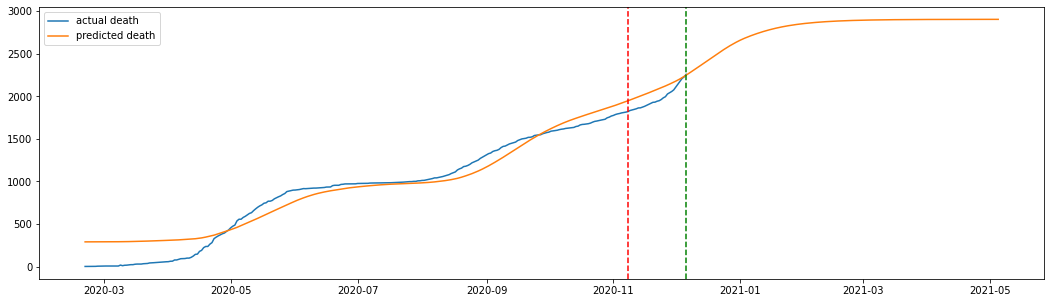

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

startDate = '2020-01-22'
endDate = '2021-05-05'
index = pd.date_range(startDate, endDate)

data_actual_dea = dataY_plot_dea.reshape(-1)
data_predict_dea = data_predict_dea.reshape(-1)

cols = ['value']

df = pd.DataFrame(data_actual_dea, index=index[30:-150], columns=cols)
df2 = pd.DataFrame(data_predict_dea, index=index[30:], columns=cols)
# df.index.freq = 'd'

fig, axs = plt.subplots(1,1, figsize=(18,5))

x = df.index
x2 = df2.index
y = df.value
y2 = df2.value

print(y.index[train_size])

axs.plot(x, y, label="actual death")
axs.plot(x2, y2, label="predicted death")
plt.axvline(x=y.index[train_size], c='r', linestyle='--')
plt.axvline(x=y.index[-1], c='g', linestyle='--')
plt.legend()
fig.show()

#Recovered

In [ ]:
L_recovery = []

# Train the model
for epoch in range(num_epochs):
    outputs = lstm_rec(trainX_rec)
    optimizer_rec.zero_grad()
    loss = criterion_rec(outputs, trainY_rec)
    loss.backward()
    optimizer_rec.step()
    L_recovery.append(loss.item())

    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.10f" % (epoch, loss.item()))

Epoch: 0, loss: 0.0669982433
Epoch: 100, loss: 0.0632299781
Epoch: 200, loss: 0.0598784238
Epoch: 300, loss: 0.0568496212
Epoch: 400, loss: 0.0540883206
Epoch: 500, loss: 0.0515698195
Epoch: 600, loss: 0.0492782854
Epoch: 700, loss: 0.0471977144
Epoch: 800, loss: 0.0453040116
Epoch: 900, loss: 0.0435566977
Epoch: 1000, loss: 0.0418963768
Epoch: 1100, loss: 0.0402479507
Epoch: 1200, loss: 0.0385241508
Epoch: 1300, loss: 0.0366210379
Epoch: 1400, loss: 0.0343982428
Epoch: 1500, loss: 0.0316344090
Epoch: 1600, loss: 0.0279334094
Epoch: 1700, loss: 0.0225905627
Epoch: 1800, loss: 0.0150816049
Epoch: 1900, loss: 0.0080173379
Epoch: 2000, loss: 0.0048283678
Epoch: 2100, loss: 0.0039041645
Epoch: 2200, loss: 0.0035088696
Epoch: 2300, loss: 0.0031921484
Epoch: 2400, loss: 0.0028908111
Epoch: 2500, loss: 0.0025991620
Epoch: 2600, loss: 0.0023172931
Epoch: 2700, loss: 0.0020461031
Epoch: 2800, loss: 0.0017869620
Epoch: 2900, loss: 0.0015416879
Epoch: 3000, loss: 0.0013125368
Epoch: 3100, loss: 0

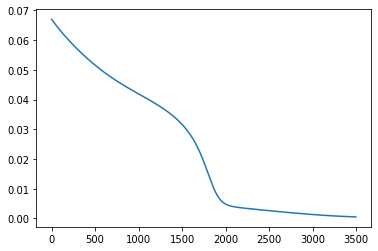

In [ ]:
plt.plot(L_recovery)
plt.show()

In [ ]:
torch.save(lstm_rec, "lstm_rec.pkl")

In [ ]:
lstm_rec.eval()
train_predict_rec = lstm_rec(dataX_rec)  #全部的x丟model

#把預測出來的加到原本的dataX，再用新的dataX丟模型
dataX_copy2_rec = dataX_rec
train_predict_copy2_rec = train_predict_rec
# print(train_predict_copy2[-3:-1])
for i in range(150):
  last = train_predict_copy2_rec[-1].reshape(1, 1)
  temp = dataX_copy2_rec[-1][1:]
  temp = torch.cat((temp, last), 0)

  temp = temp.reshape(1, seq_length, 1)
  dataX_copy2_rec = torch.cat((dataX_copy2_rec, temp), 0)

  predict = lstm_rec(dataX_copy2_rec.float())
  # print(predict[-1])
  train_predict_copy2_rec = torch.cat((train_predict_copy2_rec, predict[-1].reshape(1, 1)), 0)


train_predict_copy2_rec = train_predict_copy2_rec.data.numpy()
data_predict_rec = sc_rec.inverse_transform(train_predict_copy2_rec)

dataY_plot_rec = dataY_rec.data.numpy()
dataY_plot_rec = sc_rec.inverse_transform(dataY_plot_rec)


predicted = pd.DataFrame(data_predict_rec)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format',lambda x : '%.10f' % x)
print(predicted[-150:])

                    0
290 110204.8437500000
291 109791.5859375000
292 109366.7500000000
293 108975.5078125000
294 108623.3515625000
295 108321.2109375000
296 108058.6093750000
297 107830.5703125000
298 107631.7265625000
299 107502.8437500000
300 107342.3671875000
301 107197.2031250000
302 107063.5000000000
303 106937.8359375000
304 106816.9843750000
305 106698.9765625000
306 106582.7421875000
307 106467.3984375000
308 106351.0156250000
309 106226.5312500000
310 106094.6328125000
311 105954.1718750000
312 105799.1328125000
313 105631.6171875000
314 105431.9765625000
315 105237.4765625000
316 105028.8281250000
317 104807.4140625000
318 104576.7031250000
319 104340.4296875000
320 104236.7500000000
321 104136.8437500000
322 104042.7656250000
323 103954.6718750000
324 103872.1953125000
325 103794.8125000000
326 103721.9062500000
327 103652.9765625000
328 103587.5156250000
329 103525.1250000000
330 103465.1875000000
331 103407.6796875000
332 103352.3671875000
333 103299.0156250000
334 103247

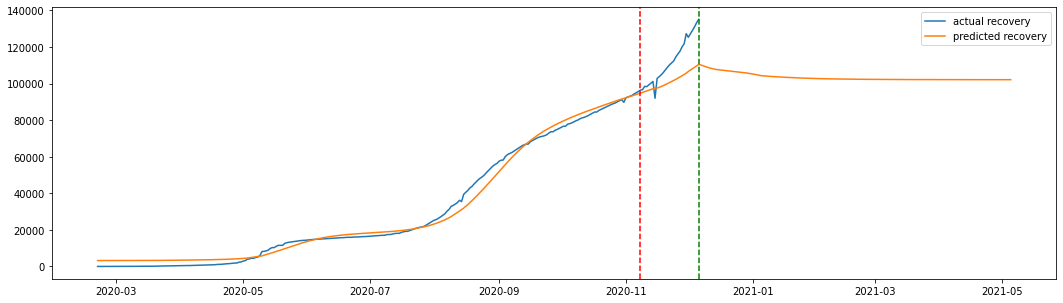

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

startDate = '2020-01-22'
endDate = '2021-05-05'
index = pd.date_range(startDate, endDate)

data_actual_rec = dataY_plot_rec.reshape(-1)
data_predict_rec = data_predict_rec.reshape(-1)

cols = ['value']

df = pd.DataFrame(data_actual_rec, index=index[30:-150], columns=cols)
df2 = pd.DataFrame(data_predict_rec, index=index[30:], columns=cols)
# df.index.freq = 'd'

fig, axs = plt.subplots(1,1, figsize=(18,5))

x = df.index
x2 = df2.index
y = df.value
y2 = df2.value

axs.plot(x, y, label="actual recovery")
axs.plot(x2, y2, label="predicted recovery")
plt.axvline(x=y.index[train_size], c='r', linestyle='--')
plt.axvline(x=y.index[-1], c='g', linestyle='--')
plt.legend()
fig.show()

#Output

In [ ]:
#data_predict_confirmed data_predict_dea data_predict_rec
future_data = {'Confirmed':data_predict_confirmed, 'Death':data_predict_dea, 'Recovered':data_predict_rec}
startDate = '2020-01-22'
endDate = '2021-05-05'
index = pd.date_range(startDate, endDate)
predicted_future = pd.DataFrame(future_data, index = index[30:])
predicted_future

,Confirmed,Death,Recovered
2020-02-21,11890.9501953125,289.8762512207,3247.1860351562
2020-02-22,11893.5185546875,289.8968505859,3248.1223144531
2020-02-23,11896.5097656250,289.9151000977,3249.0205078125
2020-02-24,11900.1777343750,289.9312438965,3249.8579101562
2020-02-25,11904.1347656250,289.9455261230,3250.6291503906
2020-02-26,11908.3027343750,289.9581909180,3251.3339843750
2020-02-27,11912.8789062500,290.0127868652,3251.9863281250
2020-02-28,11918.0156250000,290.1495666504,3252.5932617188
2020-02-29,11923.3906250000,290.2764892578,3253.1621093750
2020-03-01,11928.9326171875,290.4391479492,3254.2573242188


#Recovered - Death

In [ ]:
L_dd = []

# Train the model
for epoch in range(num_epochs):
    outputs = lstm_dd(trainX_dd)
    optimizer_dd.zero_grad()
    loss = criterion_dd(outputs, trainY_dd)
    loss.backward()
    optimizer_dd.step()
    L_dd.append(loss.item())

    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.10f" % (epoch, loss.item()))

Epoch: 0, loss: 0.1156284586
Epoch: 100, loss: 0.0005632188
Epoch: 200, loss: 0.0005566827
Epoch: 300, loss: 0.0005486683
Epoch: 400, loss: 0.0005387723
Epoch: 500, loss: 0.0005263853
Epoch: 600, loss: 0.0005098692
Epoch: 700, loss: 0.0004843182
Epoch: 800, loss: 0.0101755494
Epoch: 900, loss: 0.0005590234
Epoch: 1000, loss: 0.0005541338
Epoch: 1100, loss: 0.0005488726
Epoch: 1200, loss: 0.0005430861
Epoch: 1300, loss: 0.0005365570
Epoch: 1400, loss: 0.0005289641
Epoch: 1500, loss: 0.0005198075
Epoch: 1600, loss: 0.0005082503
Epoch: 1700, loss: 0.0004927363
Epoch: 1800, loss: 0.0004698640
Epoch: 1900, loss: 0.0004298641
Epoch: 2000, loss: 0.0007820497
Epoch: 2100, loss: 0.0004722463
Epoch: 2200, loss: 0.0004462283
Epoch: 2300, loss: 0.0004112726
Epoch: 2400, loss: 0.0003792905
Epoch: 2500, loss: 0.0003708694
Epoch: 2600, loss: 0.0003657618
Epoch: 2700, loss: 0.0003612622
Epoch: 2800, loss: 0.0003570095
Epoch: 2900, loss: 0.0003677793
Epoch: 3000, loss: 0.0003484089
Epoch: 3100, loss: 0

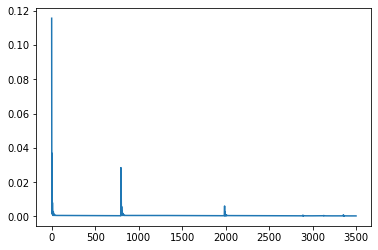

In [ ]:
plt.plot(L_dd)
plt.show()

In [ ]:
lstm_dd.eval()
train_predict_dd = lstm_dd(dataX_dd)  #全部的x丟model

#把預測出來的加到原本的dataX，再用新的dataX丟模型
dataX_copy2_dd = dataX_dd
train_predict_copy2_dd = train_predict_dd
# print(train_predict_copy2[-3:-1])
for i in range(150):
  last = train_predict_copy2_dd[-1].reshape(1, 1)
  temp = dataX_copy2_dd[-1][1:]
  temp = torch.cat((temp, last), 0)

  temp = temp.reshape(1, seq_length, 1)
  dataX_copy2_dd = torch.cat((dataX_copy2_dd, temp), 0)

  predict = lstm_dd(dataX_copy2_dd.float())
  # print(predict[-1])
  train_predict_copy2_dd = torch.cat((train_predict_copy2_dd, predict[-1].reshape(1, 1)), 0)


train_predict_copy2_dd = train_predict_copy2_dd.data.numpy()
data_predict_dd = sc_d_Rec_d_Dea.inverse_transform(train_predict_copy2_dd)

dataY_plot_dd = dataY_dd.data.numpy()
dataY_plot_dd = sc_d_Rec_d_Dea.inverse_transform(dataY_plot_dd)


predicted_dd = pd.DataFrame(data_predict_dd)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format',lambda x : '%.10f' % x)
print(predicted_dd[-150:])

                  0
290 1646.9438476562
291 1614.4044189453
292 1579.2470703125
293 1550.4627685547
294 1489.5899658203
295 1468.1304931641
296 1409.0490722656
297 1352.4145507812
298 1295.0133056641
299 1433.2280273438
300 1084.2490234375
301 1079.0253906250
302 1037.6864013672
303  989.9170532227
304  937.3712768555
305  884.1820678711
306  832.2235107422
307  780.2230224609
308  724.2653198242
309  643.3549804688
310  586.6796875000
311  537.8113403320
312  473.2478637695
313  436.0539550781
314  318.9650268555
315  395.5653076172
316  330.3668212891
317  283.9225463867
318  245.9130249023
319  207.1345214844
320  190.2817840576
321  171.7870788574
322  155.9329376221
323  142.6990203857
324  132.0135803223
325  124.6910400391
326  119.7686843872
327  118.3455581665
328  119.9241561890
329  124.0930862427
330  126.8317184448
331  138.8876647949
332  149.1198425293
333  160.0480499268
334  171.8707885742
335  184.6717834473
336  198.3924407959
337  212.9059753418
338  228.0760650635


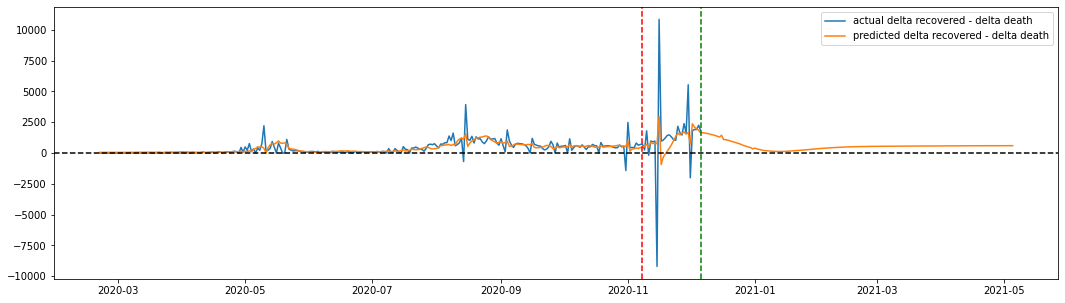

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

startDate = '2020-01-22'
endDate = '2021-05-05'
index = pd.date_range(startDate, endDate)

data_actual_dd = dataY_plot_dd.reshape(-1)
data_predict_dd = data_predict_dd.reshape(-1)

cols = ['value']

df = pd.DataFrame(data_actual_dd, index=index[30:-150], columns=cols)
df2 = pd.DataFrame(data_predict_dd, index=index[30:], columns=cols)
# df.index.freq = 'd'

fig, axs = plt.subplots(1,1, figsize=(18,5))

x = df.index
x2 = df2.index
y = df.value
y2 = df2.value


axs.plot(x, y, label="actual delta recovered - delta death")
axs.plot(x2, y2, label="predicted delta recovered - delta death")
plt.axvline(x=y.index[train_size], c='r', linestyle='--')
plt.axvline(x=y.index[-1], c='g', linestyle='--')
plt.axhline(y=0, c='black', linestyle='--')
plt.legend()
fig.show()

#Active growth rate

In [ ]:
L_ac_rate = []

# Train the model
for epoch in range(num_epochs):
    outputs = lstm_ac_rate(trainX_ac_rate)
    optimizer_ac_rate.zero_grad()
    loss = criterion_ac_rate(outputs, trainY_ac_rate)
    loss.backward()
    optimizer_ac_rate.step()
    L_ac_rate.append(loss.item())

    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.10f" % (epoch, loss.item()))

Epoch: 0, loss: 0.1005804762
Epoch: 100, loss: 0.0020813900
Epoch: 200, loss: 0.0018068942
Epoch: 300, loss: 0.0013560720
Epoch: 400, loss: 0.0013094239
Epoch: 500, loss: 0.0012664880
Epoch: 600, loss: 0.0012130867
Epoch: 700, loss: 0.0011672920
Epoch: 800, loss: 0.0011079737
Epoch: 900, loss: 0.0011891556
Epoch: 1000, loss: 0.0010616967
Epoch: 1100, loss: 0.0010335468
Epoch: 1200, loss: 0.0009972644
Epoch: 1300, loss: 0.0009472634
Epoch: 1400, loss: 0.0008947902
Epoch: 1500, loss: 0.0008491811
Epoch: 1600, loss: 0.0008005594
Epoch: 1700, loss: 0.0008061790
Epoch: 1800, loss: 0.0007371990
Epoch: 1900, loss: 0.0007082201
Epoch: 2000, loss: 0.0011039308
Epoch: 2100, loss: 0.0006304915
Epoch: 2200, loss: 0.0005829819
Epoch: 2300, loss: 0.0005955026
Epoch: 2400, loss: 0.0006808641
Epoch: 2500, loss: 0.0004560582
Epoch: 2600, loss: 0.0004311275
Epoch: 2700, loss: 0.0004156196
Epoch: 2800, loss: 0.0004562828
Epoch: 2900, loss: 0.0003879429
Epoch: 3000, loss: 0.0002213763
Epoch: 3100, loss: 0

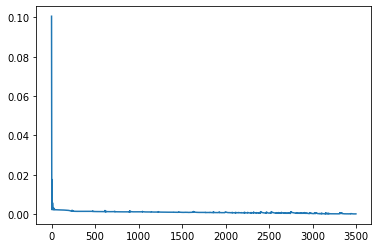

In [ ]:
plt.plot(L_ac_rate)
plt.show()

In [ ]:
lstm_ac_rate.eval()
train_predict_ac_rate = lstm_ac_rate(dataX_ac_rate)  #全部的x丟model
# print(train_predict_ac_rate.size())

#把預測出來的加到原本的dataX，再用新的dataX丟模型
dataX_copy2_ac_rate = dataX_ac_rate
train_predict_copy2_ac_rate = train_predict_ac_rate
# print(train_predict_copy2[-3:-1])
for i in range(150):
  last = train_predict_copy2_ac_rate[-1].reshape(1, 1)
  temp = dataX_copy2_ac_rate[-1][1:]
  temp = torch.cat((temp, last), 0)

  temp = temp.reshape(1, seq_length, 1)
  dataX_copy2_ac_rate = torch.cat((dataX_copy2_ac_rate, temp), 0)

  predict = lstm_ac_rate(dataX_copy2_ac_rate.float())
  # print(predict[-1])
  train_predict_copy2_ac_rate = torch.cat((train_predict_copy2_ac_rate, predict[-1].reshape(1, 1)), 0)

train_predict_copy2_ac_rate = train_predict_copy2_ac_rate.data.numpy()
data_predict_ac_rate = sc_ac_rate.inverse_transform(train_predict_copy2_ac_rate)

dataY_plot_ac_rate = dataY_ac_rate.data.numpy()
dataY_plot_ac_rate = sc_ac_rate.inverse_transform(dataY_plot_ac_rate)

predicted_ac_rate = pd.DataFrame(data_predict_ac_rate)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format',lambda x : '%.10f' % x)
print(predicted_ac_rate[-150:])

                0
290  0.1417786926
291  0.2116481960
292  0.0481456406
293 -0.0019499164
294  0.2150722593
295  0.1751907915
296  0.1460004002
297  0.1066523865
298  0.1995696872
299  0.1887555569
300  0.0024202685
301  0.1334478408
302  0.1844269633
303  0.0474685989
304  0.0724062175
305  0.0521095805
306 -0.0774298459
307  0.0511478558
308  0.0647210926
309 -0.0110349646
310  0.0328199714
311  0.0928707793
312 -0.0814763680
313  0.0577051565
314 -0.0320239067
315 -0.0314540230
316  0.0145820789
317 -0.0175563674
318 -0.0519259982
319  0.0643149838
320  0.0822617784
321 -0.1044195145
322  0.0182939526
323 -0.0516571477
324 -0.0029055064
325  0.0034878673
326 -0.2034519911
327 -0.2142520249
328 -0.1345178932
329  0.0971523970
330 -0.0851017609
331  0.0650223121
332 -0.0673397183
333 -0.1560153514
334 -0.1108942777
335  0.0229681190
336 -0.1104615554
337 -0.3266057968
338 -0.2008894235
339  0.0157151893
340  0.0237742383
341 -0.2015803903
342 -0.0546654984
343 -0.0240404047
344 -0.007

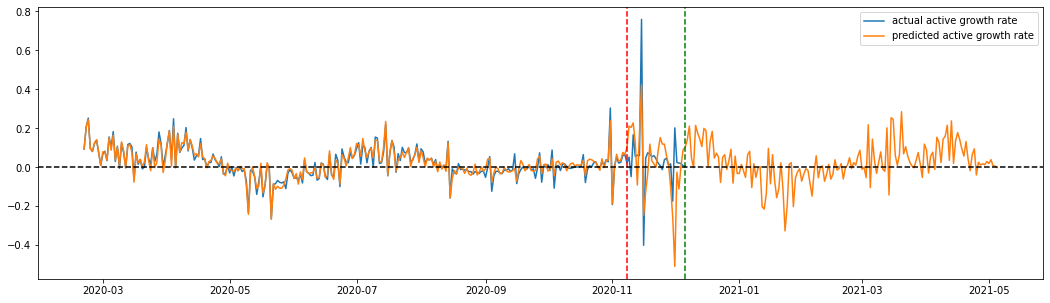

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

startDate = '2020-01-22'
endDate = '2021-05-05'
index = pd.date_range(startDate, endDate)

dataY_plot_ac_rate = dataY_plot_ac_rate.reshape(-1)
data_predict_ac_rate = data_predict_ac_rate.reshape(-1)

cols = ['value']

df = pd.DataFrame(dataY_plot_ac_rate, index=index[30:-150], columns=cols)
df2 = pd.DataFrame(data_predict_ac_rate, index=index[30:], columns=cols)
# df.index.freq = 'd'

fig, axs = plt.subplots(1,1, figsize=(18,5))

x = df.index
x2 = df2.index
y = df.value
y2 = df2.value


axs.plot(x, y, label="actual active growth rate")
axs.plot(x2, y2, label="predicted active growth rate")
plt.axvline(x=y.index[train_size], c='r', linestyle='--')
plt.axvline(x=y.index[-1], c='g', linestyle='--')
plt.axhline(y=0, c='black', linestyle='--')
plt.legend()
fig.show()

#Result

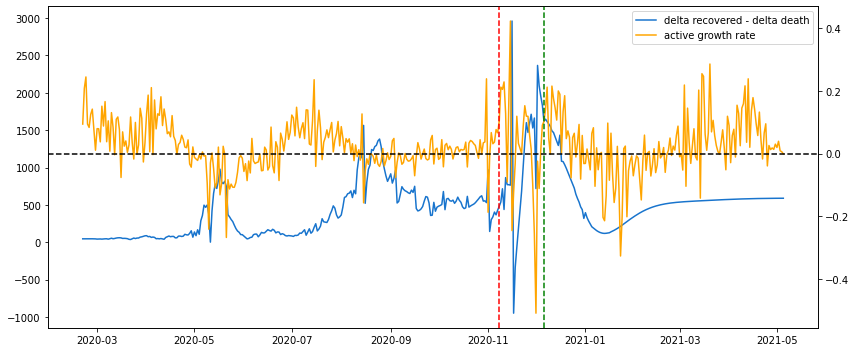

In [ ]:
startDate = '2020-01-22'
endDate = '2021-05-05'
index = pd.date_range(startDate, endDate)

data_predict_dd = data_predict_dd.reshape(-1)
data_predict_ac_rate = data_predict_ac_rate.reshape(-1)

cols = ['value']

df_dd = pd.DataFrame(data_predict_dd, index=index[30:], columns=cols)
df_ac_rate = pd.DataFrame(data_predict_ac_rate, index=index[30:], columns=cols)

fig, axs = plt.subplots(1,1, figsize=(12,5))
ax2 = axs.twinx()

x_dd = df_dd.index
y_dd = df_dd.value
x_ac_rate = df_ac_rate.index
y_ac_rate = df_ac_rate.value


lns1 = axs.plot(x_dd, y_dd, c='#1874CD', label="delta recovered - delta death")
lns2 = ax2.plot(x_ac_rate, y_ac_rate, c='#FFA500', label="active growth rate")
plt.axvline(x=y_dd.index[train_size], c='r', linestyle='--')
plt.axvline(x=y.index[-1], c='g', linestyle='--')
plt.axhline(y=0, c='black', linestyle='--')
fig.tight_layout()
lns = lns1+lns2
labs = [l.get_label() for l in lns]
axs.legend(lns, labs, loc=0)
fig.show()